In [3]:
import xarray as xr

# Load the data
ds = xr.open_dataset('/media/volume/sdc/ross_data/publication/jet/forcing1.zarr')
ds

/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset>
Dimensions:            (run: 275, l: 64, k: 33, lev: 2, time: 87, y: 64, x: 64,
                        lev_mid: 1)
Coordinates:
  * k                  (k) float32 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float32 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int32 1 2
  * lev_mid            (lev_mid) float32 1.5
  * time               (time) float32 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * x                  (x) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Dimensions without coordinates: run
Data variables: (12/36)
    APEflux            (run, l, k) float32 ...
    APEgen             (run) float32 ...
    APEgenspec         (run, l, k) float32 ...
    Dissspec           (run, l, k) float32 ...
    EKE                (run, lev) float32 ...
    EKEdiss            (run) float32 ...
    ...                 ...
    uv_subgrid_flux    (run, time, lev, y, x) float32 ...
    v                  (run, time, lev, y, x) float32 ...
    v_subgrid_forcing  (run, time, lev, y, x) float32 ...
    vfull              (run, time, lev, y, x) float32 ...
    vq_subgrid_flux    (run, time, lev, y, x) float32 ...
    vv_subgrid_flux    (run, time, lev, y, x) float32 ...
Attributes: (12/26)
    hires:           256
    lores:           64
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1e-11
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           Subgrid forcing dataset generated by coarsening nx=256 p...

Total number of data for training: 

In [7]:
print("Total number of data for training: ",  0.9 * (87-69+1) * 275)
print("Total number of data for testing: ",  0.1 * (87-69+1) * 275)

Total number of data for training:  4702.5
Total number of data for testing:  522.5


Check KE for picking the index

In [8]:
import xarray as xr
def ave_lev(arr: xr.DataArray, delta):
    '''
    Average over depth xarray
    delta = H1/H2
    H = H1+H2
    Weights are:
    Hi[0] = H1/H = H1/(H1+H2)=H1/H2/(H1/H2+1)=delta/(1+delta)
    Hi[1] = H2/H = H2/(H1+H2)=1/(1+delta)
    '''
    if 'lev' in arr.dims:
        Hi = xr.DataArray([delta/(1+delta), 1/(1+delta)], dims=['lev'])
        out  = (arr*Hi).sum(dim='lev')
        out.attrs = arr.attrs
        return out
    else:
        return arr

def KE(ds):
        return (ds.u**2 + ds.v**2) * 0.5


def Ens(ds):
        return 0.5 * (relative_vorticity(ds))**2

def KE_time(ds):
        delta=0.1
        return ave_lev(KE(ds), delta=delta).mean(('run', 'x', 'y'))
        # return ave_lev(KE(ds), delta=delta).mean(( 'x', 'y'))
    

In [11]:
ke = KE_time(ds)

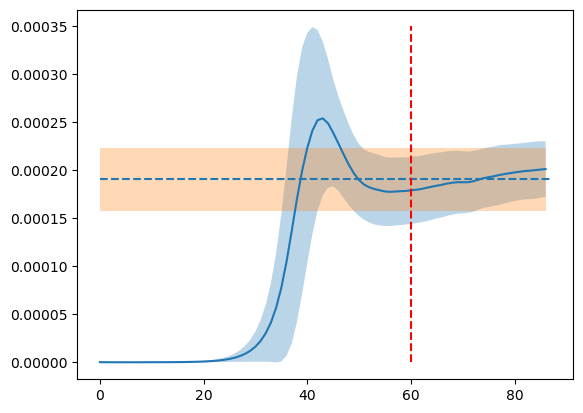

In [86]:
import matplotlib.pyplot as plt
index = 60
plt.plot(ke.mean('run'))
plt.fill_between(range(87),ke.mean('run')-ke.std('run'), ke.mean('run')+ke.std('run'), alpha=0.3)
plt.hlines(ke.isel(time=slice(60,None)).mean(('run','time')), 0, 87, linestyles='dashed')
plt.vlines(60, 0, 0.00035, linestyles='dashed', colors='r')
plt.fill_between(range(87),ke.isel(time=slice(60,None)).mean(('run','time'))-ke.isel(time=slice(60,None)).std(('run','time')), ke.isel(time=slice(60,None)).mean(('run','time'))+ke.isel(time=slice(60,None)).std(('run','time')), alpha=0.3)
plt.show()

In [104]:
ds

<xarray.Dataset>
Dimensions:            (run: 275, l: 64, k: 33, lev: 2, time: 87, y: 64, x: 64,
                        lev_mid: 1)
Coordinates:
  * k                  (k) float32 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float32 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int32 1 2
  * lev_mid            (lev_mid) float32 1.5
  * time               (time) float32 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * x                  (x) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Dimensions without coordinates: run
Data variables: (12/36)
    APEflux            (run, l, k) float32 ...
    APEgen             (run) float32 ...
    APEgenspec         (run, l, k) float32 ...
    Dissspec           (run, l, k) float32 ...
    EKE                (run, lev) float32 ...
    EKEdiss            (run) float32 ...
    ...                 ...
    uv_subgrid_flux    (run, time, lev, y, x) float32 ...
    v                  (run, time, lev, y, x) float32 0.001578 ... -0.008508
    v_subgrid_forcing  (run, time, lev, y, x) float32 ...
    vfull              (run, time, lev, y, x) float32 ...
    vq_subgrid_flux    (run, time, lev, y, x) float32 ...
    vv_subgrid_flux    (run, time, lev, y, x) float32 ...
Attributes: (12/26)
    hires:           256
    lores:           64
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1e-11
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           Subgrid forcing dataset generated by coarsening nx=256 p...

In [119]:
# Initialize lists to store data
u_list = []
v_list = []
q_subgrid_forcing_list = []

# Loop over all runs
for i in range(275):  # Replace number_of_runs with the actual number of runs
    u_list.append(ds.u.isel(run=i, time=slice(60, None)))
    v_list.append(ds.v.isel(run=i, time=slice(60, None)))
    q_subgrid_forcing_list.append(ds.q_subgrid_forcing.isel(run=i, time=slice(60, None)))

# Concatenate the data along the time dimension
u_concatenated = xr.concat(u_list, dim='time')
v_concatenated = xr.concat(v_list, dim='time')
q_subgrid_forcing_concatenated = xr.concat(q_subgrid_forcing_list, dim='time')


# Save the concatenated data to disk
u_concatenated.to_netcdf('/media/volume/sdc/ross_data/publication/jet/u_concatenated.nc')
v_concatenated.to_netcdf('/media/volume/sdc/ross_data/publication/jet/v_concatenated.nc')
q_subgrid_forcing_concatenated.to_netcdf('/media/volume/sdc/ross_data/publication/jet/q_subgrid_forcing_concatenated.nc')